In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data=pd.read_csv("StudentsPerformance.csv")
data.head()


,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group C,some high school,free/reduced,none,0,17,10
1,female,group B,high school,free/reduced,none,8,24,23
2,female,group B,some high school,free/reduced,none,18,32,28
3,female,group B,some college,standard,none,11,38,32
4,female,group C,some college,free/reduced,none,22,39,33


In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


# 1. Find out how many males and females participated in the test.

In [3]:
data['gender'].value_counts()

female    518
male      482
Name: gender, dtype: int64

More female participated

# 2. What do you think about the students' parental level of education?

In [4]:
data["parental level of education"].value_counts()

some college          226
associate's degree    222
high school           196
some high school      179
bachelor's degree     118
master's degree        59
Name: parental level of education, dtype: int64

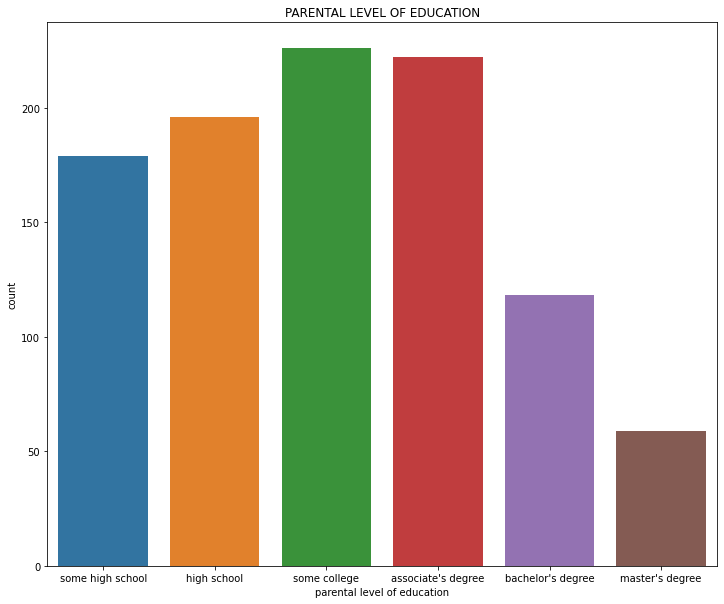

In [18]:
plt.figure(figsize=(12,10))
sns.countplot(x='parental level of education',data=data)
plt.title('PARENTAL LEVEL OF EDUCATION')
plt.show()

more parents went some college and less parents have master's degree

# 3. Who scores the most on average for math, reading and writing based on

# Gender

# math score

In [19]:
d1=data.groupby('gender')
a1=d1['math score'].mean()
a1

gender
female    63.376448
male      68.821577
Name: math score, dtype: float64

In [20]:
a1.nlargest(1)

gender
male    68.821577
Name: math score, dtype: float64

# Reading Score

In [31]:
d1=data.groupby('gender')
a2=d1['reading score'].mean()
a2

gender
female    72.590734
male      65.545643
Name: reading score, dtype: float64

In [33]:
a2.nlargest(1)

gender
female    72.590734
Name: reading score, dtype: float64

# Writing Score

In [34]:
d1=data.groupby('gender')
a3=d1['writing score'].mean()
a3

gender
female    72.467181
male      63.446058
Name: writing score, dtype: float64

In [35]:
a3.nlargest(1)

gender
female    72.467181
Name: writing score, dtype: float64

# Test preparation course

In [39]:
d1=data.groupby('test preparation course')
a4=d1[['math score','reading score','writing score']].mean()
a4

,math score,reading score,writing score
test preparation course,,,
completed,69.96648,74.175978,74.684358
none,63.78972,66.417445,64.457944


Students who completed test preparation course scored more marks compared to the students who don't complete the course

# 4. What do you think about the scoring variation for math, reading and writing

# gender

# Math Score

In [23]:
d3=data.groupby('gender')['math score'].std()
d3

gender
female    16.029928
male      14.556411
Name: math score, dtype: float64

In [24]:
d3.nsmallest(1)

gender
male    14.556411
Name: math score, dtype: float64

male have more consistent with math score 

# Reading Score

In [47]:
d3=data.groupby('gender')['reading score'].std()
d3

gender
female    14.411018
male      14.149594
Name: reading score, dtype: float64

In [48]:
d3.nsmallest(1)

gender
male    14.149594
Name: reading score, dtype: float64

male have more consistent with reading score

# Writing Score

In [49]:
d3=data.groupby('gender')['writing score'].std()
d3

gender
female    14.844842
male      14.227225
Name: writing score, dtype: float64

In [50]:
d3.nsmallest(1)

gender
male    14.227225
Name: writing score, dtype: float64

male have more consistent with writing score

# Test preparation course

In [51]:
d4=data.groupby('test preparation course')[['math score','reading score','writing score']].std()
d4

,math score,reading score,writing score
test preparation course,,,
completed,14.521847,13.537572,13.236412
none,15.705689,14.608896,15.041667


studens who completed test prepartion course are consistent with math score

# 5.Students eligible for bonus points

In [52]:
data.describe()

,math score,reading score,writing score
count,1000.000000,1000.000000,1000.000000
mean,66.001000,69.195000,68.119000
std,15.569567,14.706436,15.226381
min,0.000000,17.000000,10.000000
25%,57.000000,59.000000,58.000000
50%,66.000000,70.000000,69.000000
75%,77.000000,79.250000,79.000000
max,100.000000,100.000000,100.000000


students who scored above 77 marks in math are eligible for bonus points

In [53]:
math_score=data['math score']
math_score=math_score[math_score>=77]
math_score.count()

255

255 students scored above 77 mark